https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model

Attribute Information:

    age
    sex
    chest pain type (4 values)
    resting blood pressure
    serum cholestoral in mg/dl
    fasting blood sugar > 120 mg/dl
    resting electrocardiographic results (values 0,1,2)
    maximum heart rate achieved
    exercise induced angina
    oldpeak = ST depression induced by exercise relative to rest
    the slope of the peak exercise ST segment
    number of major vessels (0-3) colored by flourosopy
    thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
print('row',df.shape[0],'\ncolumn',df.shape[1])
print('---------------')
print(df.sample(5))
print('-----------------')
print(df.nunique())

row 303 
column 14
---------------
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   70    1   0       130   322    0        0      109      0      2.4   
235   51    1   0       140   299    0        1      173      1      1.6   
197   67    1   0       125   254    1        1      163      0      0.2   
240   70    1   2       160   269    0        1      112      1      2.9   
194   60    1   2       140   185    0        0      155      0      3.0   

     slope  ca  thal  target  
234      1   3     2       0  
235      2   0     3       0  
197      1   2     3       0  
240      1   1     3       0  
194      1   0     2       0  
-----------------
age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


In [3]:
cat_var = [i for i in df.columns if (df[i].nunique()<=10)&(i!='target')]
continuous_var = [i for i in df.columns if df[i].nunique()>=10]
y = df.target
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### EDA

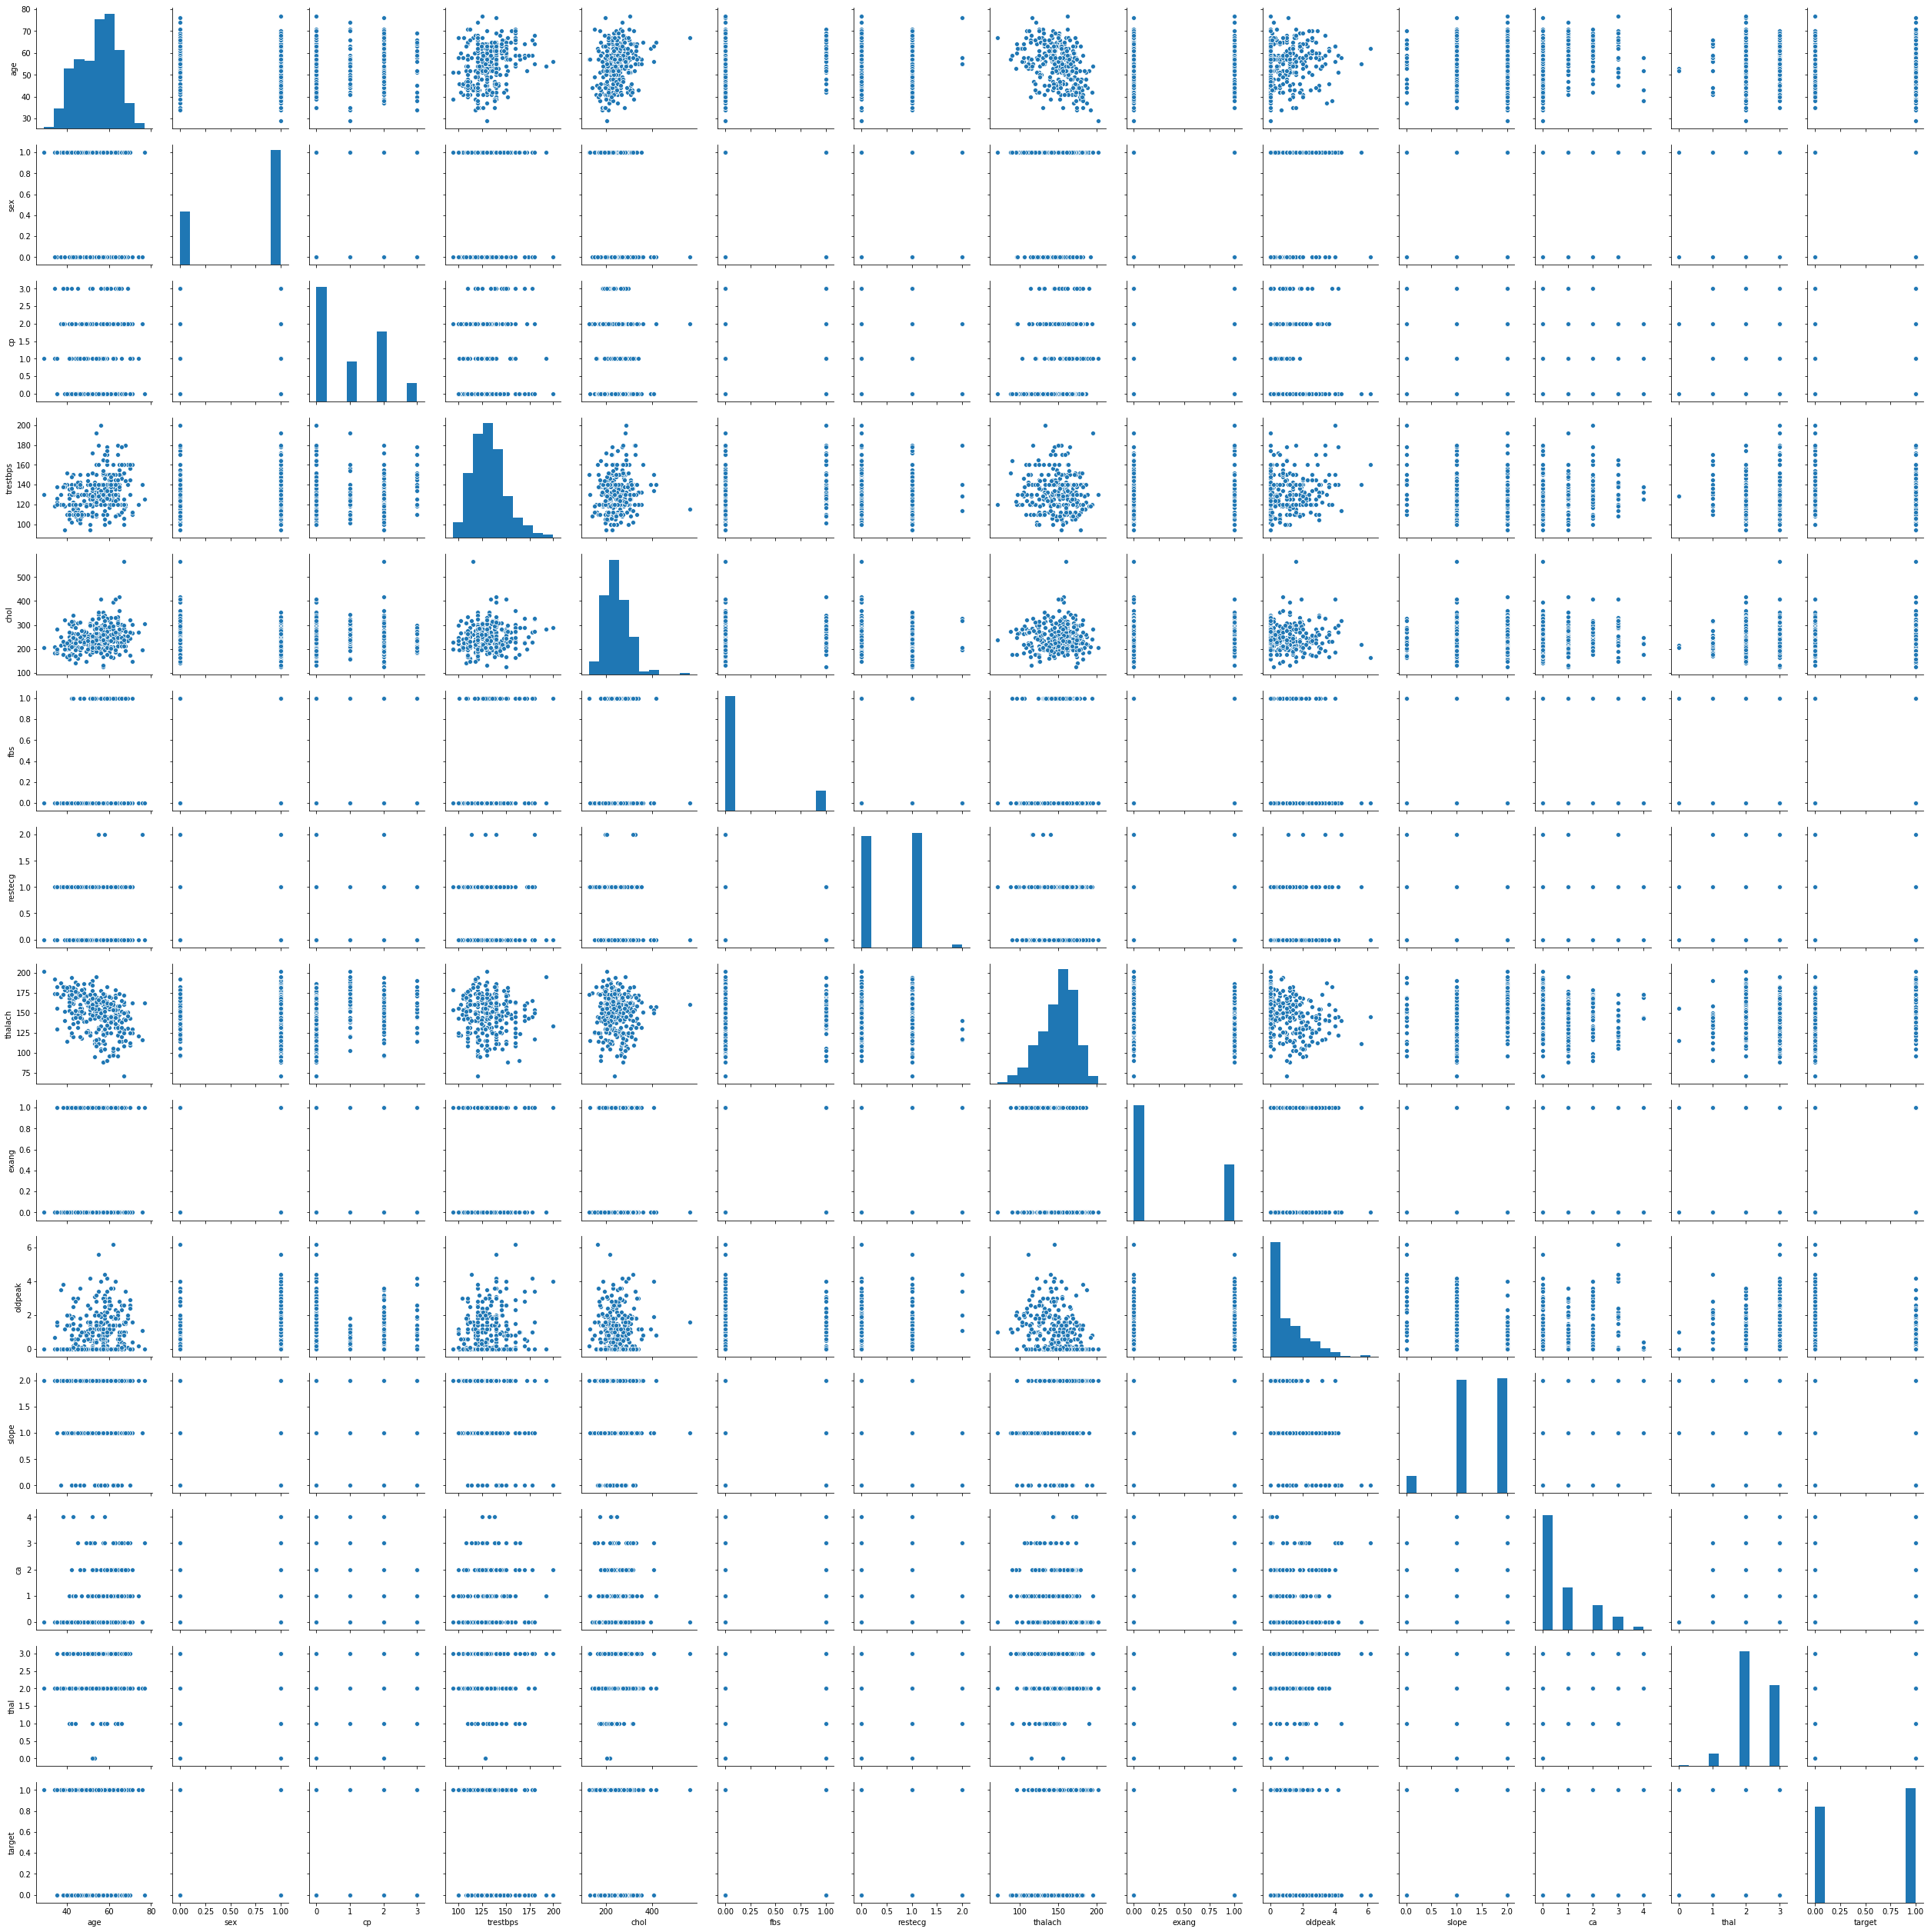

In [9]:
sns.pairplot(df)
##變數間無相依性，跟y也沒有特別顯著的關係

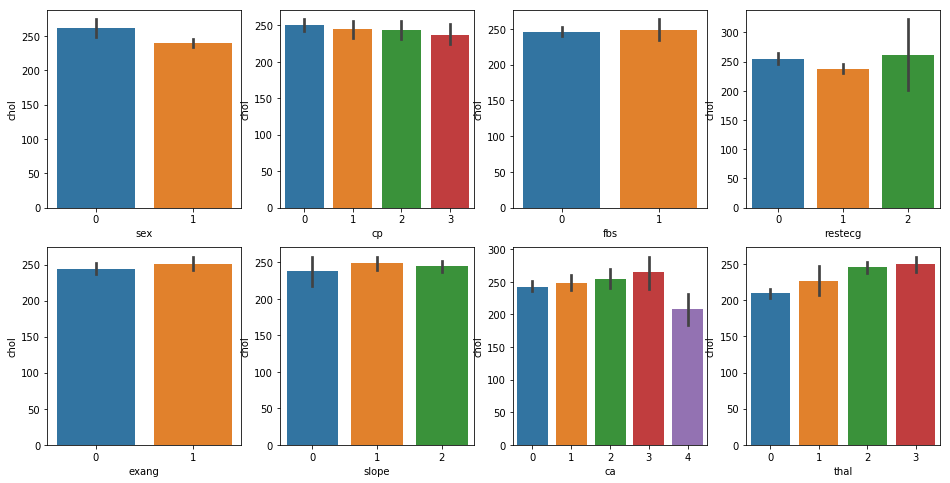

In [31]:
plt.figure(figsize=(16,8))
for i,k in enumerate(cat_var):
    ax = plt.subplot(2,4,i+1)
    sns.barplot(x=k,y='chol',data=df,ax=ax)
plt.show()

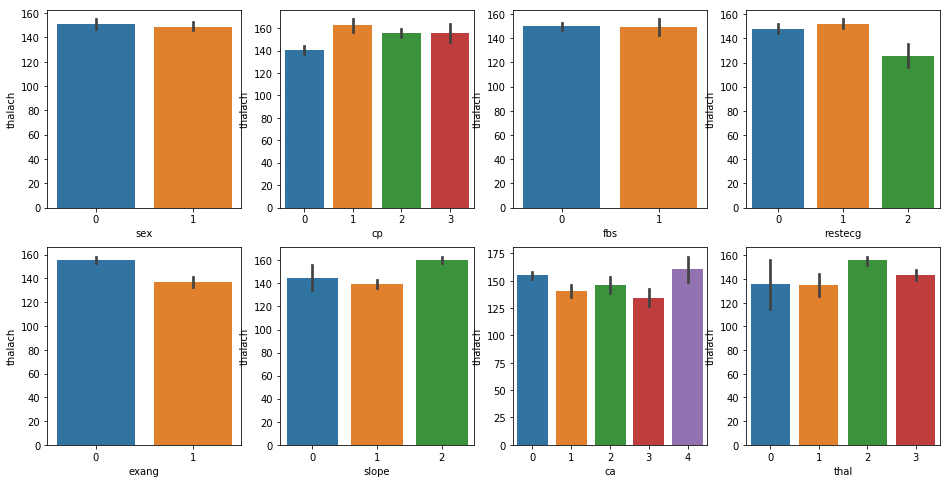

In [33]:
plt.figure(figsize=(16,8))
for i,k in enumerate(cat_var):
    ax = plt.subplot(2,4,i+1)
    sns.barplot(x=k,y='thalach',data=df,ax=ax)
plt.show()

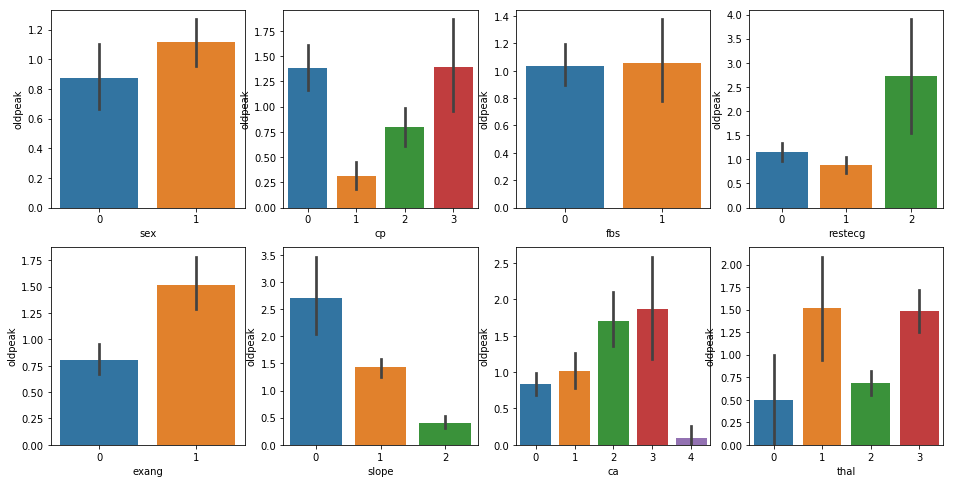

In [34]:
plt.figure(figsize=(16,8))
for i,k in enumerate(cat_var):
    ax = plt.subplot(2,4,i+1)
    sns.barplot(x=k,y='oldpeak',data=df,ax=ax)
plt.show()

##oldpeak對各個類別變數而言，可以很好區分各個類別，稍後可以拿出來跟target比對看看

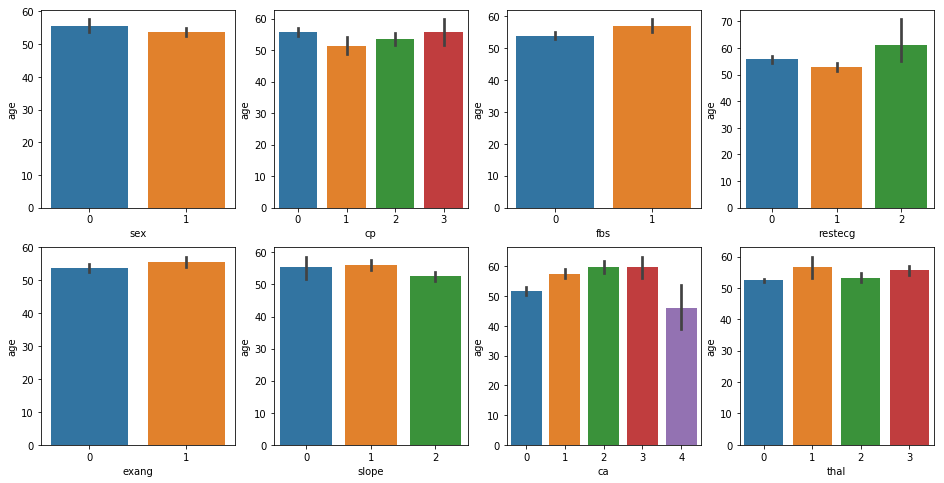

In [35]:
plt.figure(figsize=(16,8))
for i,k in enumerate(cat_var):
    ax = plt.subplot(2,4,i+1)
    sns.barplot(x=k,y='age',data=df,ax=ax)
plt.show()

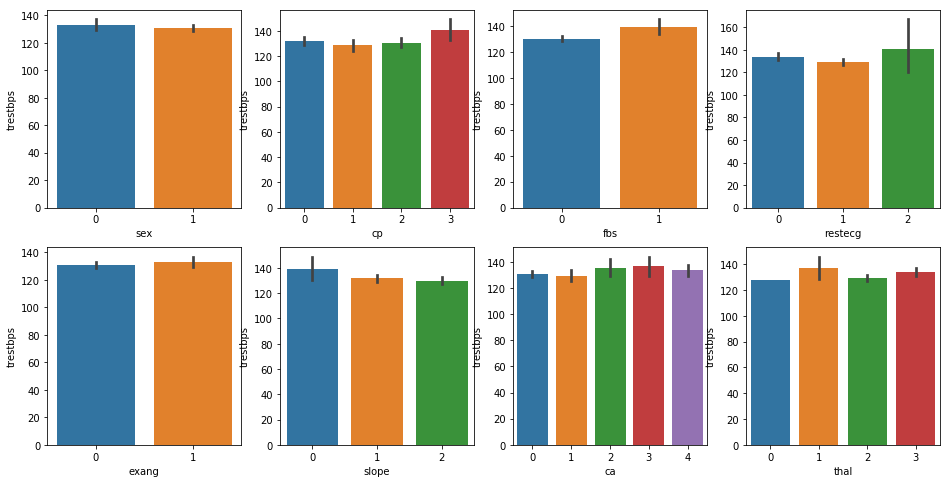

In [101]:
plt.figure(figsize=(16,8))
for i,k in enumerate(cat_var):
    ax = plt.subplot(2,4,i+1)
    sns.barplot(x=k,y='trestbps',data=df,ax=ax)
plt.show()

### Taregt與其他變數比較

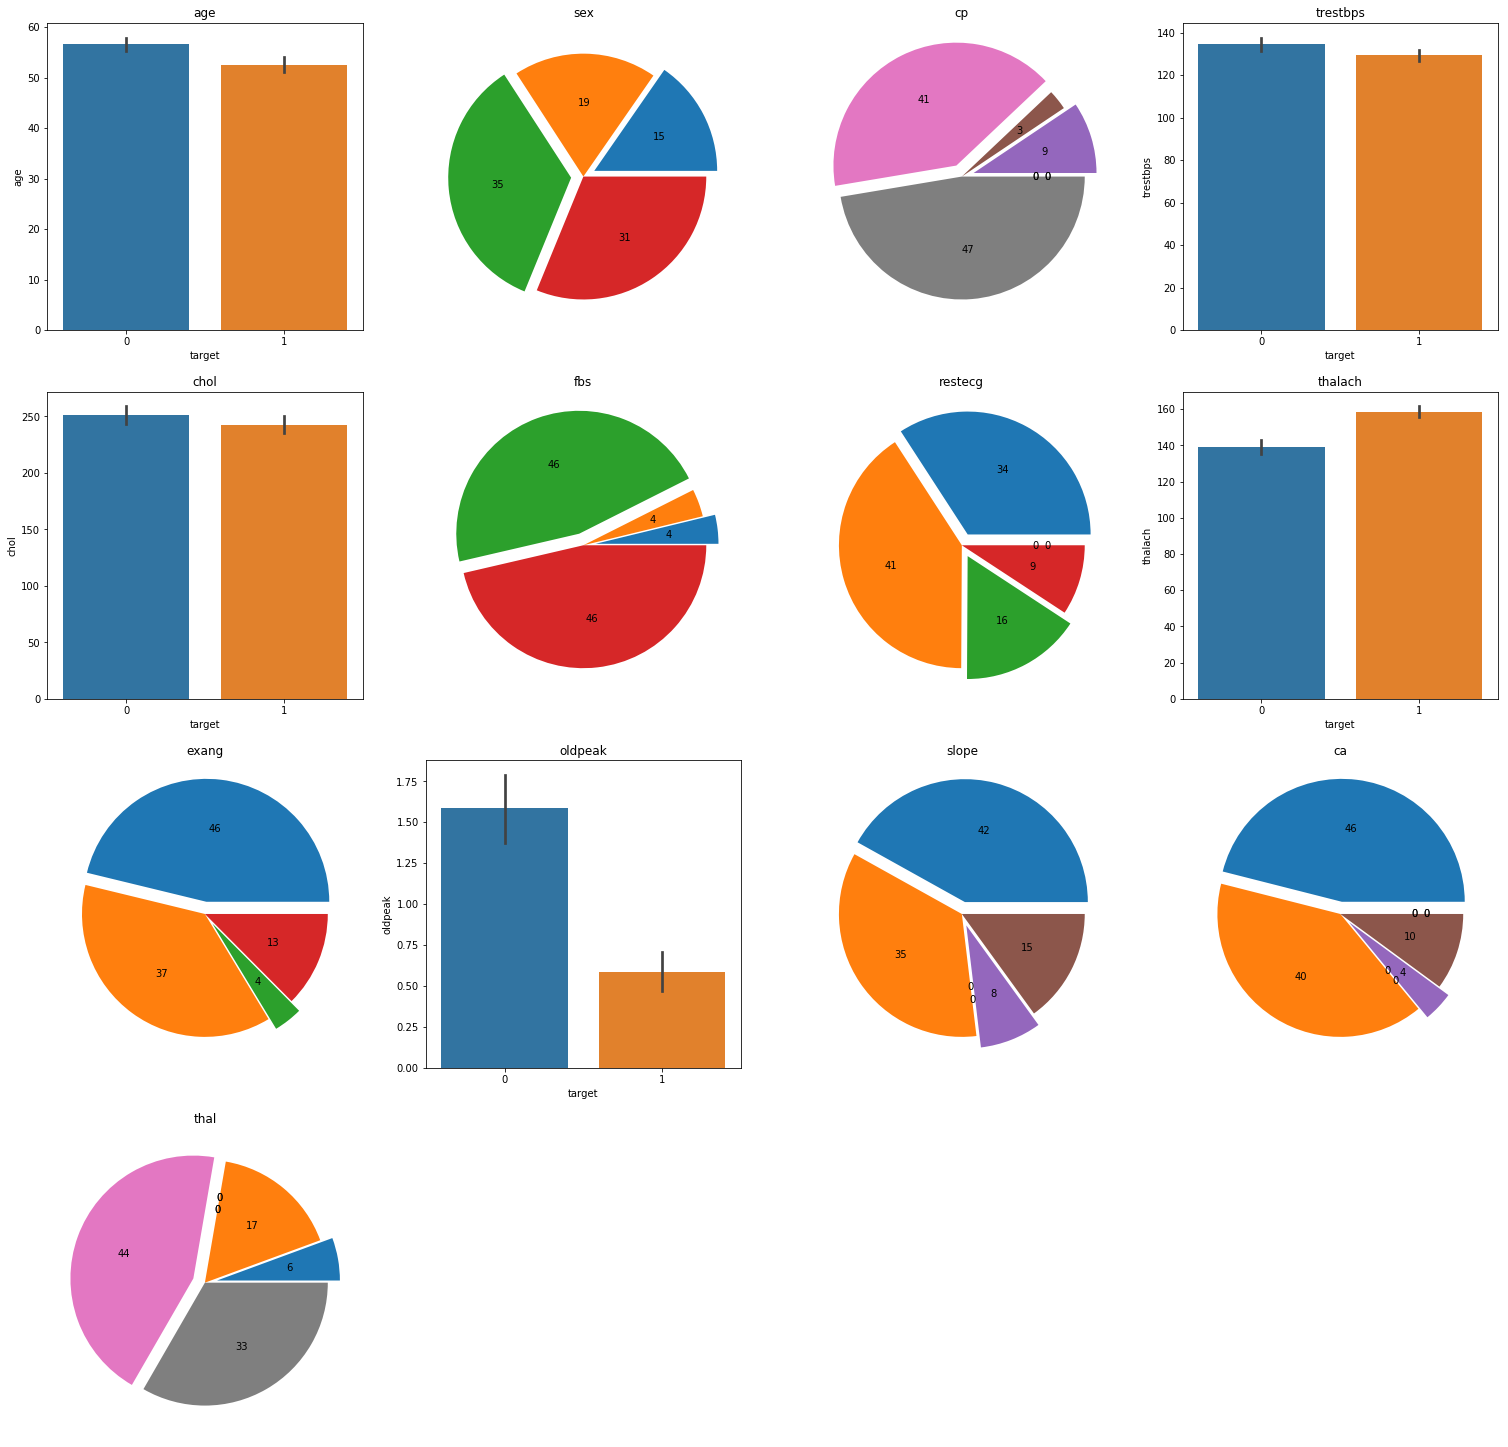

In [108]:
compare_col = [i for i in df.columns if i !='target']

plt.figure(figsize=(26,26))
for i,k in enumerate(compare_col):
    if i+1 <=13:
        ax = plt.subplot(4,4,i+1)
        ax.title.set_text(k)
        if k in cat_var:
            label_list=[]
            count_list=[]
            explode_list=[]
            for a,b in enumerate((df[k].unique())):
                for u in df['target'].unique():
                    if u==1: 
                        explode_list.append(0.1) 
                    else: 
                        explode_list.append(0)
                    count=len(df[(df['target']==u)&df[k]==b])
                    count_list.append(count)
                    label=k+b.astype(str)+'_target'+u.astype(str)
                    label_list.append(label)
            #plt.pie(count_list,labels=label_list,autopct='%.0f',explode=explode_list)
            plt.pie(count_list,autopct='%.0f',explode=explode_list)
        if k in continuous_var:
            sns.barplot(x='target',y=k,data=df,ax=ax)
            
plt.show()
##pie chart 突出來的target為1

## Feature_engineer

In [4]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop('target',axis=1)
X_nor = X
print(X.head())
scaler = MinMaxScaler()
X_nor[continuous_var] = scaler.fit_transform(X_nor[continuous_var])
print(X_nor.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333    1   3  0.481132  0.244292    1        0  0.603053      0   
1  0.166667    1   2  0.339623  0.283105    0        1  0.885496      0   
2  0.250000    0   1  0.339623  0.178082    0        0  0.770992      0   
3  0.562500    1   1  0.245283  0.251142    0        1  0.816794      0   
4  0.583333    0   0  0.245283  0.520548    0        1

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_nor,y,test_size=.15)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((257, 13), (46, 13), (257,), (46,))

## Model selection

In [6]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
svc = SVC(probability=True)
lr = LogisticRegression()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
report_svc = classification_report(y_test,y_pred_svc)
print(report_svc)
print('-------------------------------------')
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
report_lr = classification_report(y_test,y_pred_lr)
print(report_lr)

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.68      0.86      0.76        22

    accuracy                           0.74        46
   macro avg       0.76      0.74      0.74        46
weighted avg       0.76      0.74      0.74        46

-------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.73      0.86      0.79        22

    accuracy                           0.78        46
   macro avg       0.79      0.79      0.78        46
weighted avg       0.79      0.78      0.78        46



In [7]:
from sklearn.model_selection import cross_val_score
score_lr = cross_val_score(lr,X_nor,y,cv = 5).mean()
score_svc = cross_val_score(svc,X_nor,y,cv = 5).mean()
print('lr_accuracy:%.2f'% score_lr)
print('svc_accuracy:%.2f'% score_svc)

lr_accuracy:0.82
svc_accuracy:0.85


### ROC_AUC

In [33]:
from sklearn.metrics import roc_curve
y_proba_svc = svc.predict_proba(X_test)
y_pos = y_proba_svc[:,1]
table_svc = pd.concat([pd.DataFrame(y_pos,columns=['proba']),y_test.reset_index().drop('index',axis=1)],axis=1)
table_svc = table.sort_values(by='proba',ascending=False)
fpr,tpr,threshold = roc_curve(table_svc['target'],table_svc['proba'])

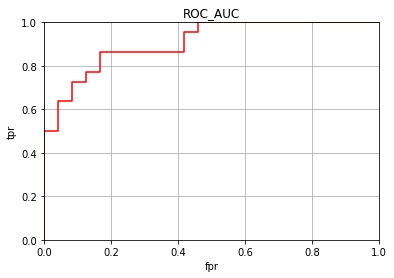

In [32]:
plt.plot(fpr,tpr,color='r')
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('ROC_AUC')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()